## OptimESM: NEMO Pipeline Regionalisation Diagnostics

In [2]:
import glob
import xarray as xr
from nemo_cookbook import NEMODataTree
import matplotlib.pyplot as plt

### UKESM1.2-LL - Regional Mixed Layer Diagnostics

In [3]:
# Define path to domain_cfg:
fpath = "/g100/home/userexternal/otooth00/OptimESM/data/CINECA/MOHC/UKESM1_Ofx/domain_cfg_Ofx_UKESM1.nc"
ds_domain = xr.open_dataset(fpath).rename({"z": "nav_lev"})

# Define path to eORCA1 monthly mean outputs:
exp_id="r1i1p1f1"
exp_name="esm-hist"
realm_name="Omon"
variable_name="thetao"
fdir=f"/g100_store/DRES_OptimESM/ESGF/prepub/mohc/20240619/CMIP6/CMIP/MOHC/UKESM1-2/{exp_name}/{exp_id}/{realm_name}"
# fdir="/g100_store/DRES_OptimESM/ESGF/prepub/mohc/20241218/CMIP6/CMIP/MOHC/UKESM1-2/${exp_name}/${exp_id}/{realm_name}"
fpaths_gridT=f"{fdir}/{variable_name}/gn/v*/{variable_name}_{realm_name}_UKESM1-2-LL_{exp_name}_{exp_id}_gn_*.nc"

# Define CFDatetimeCoder to decode time coords:
coder = xr.coders.CFDatetimeCoder(time_unit="s")
ds_gridT = xr.open_mfdataset(fpaths_gridT,
                             data_vars="minimal",
                             compat="no_conflicts",
                             decode_times=coder,
                             parallel=False,
                             engine="netcdf4"
                            )

ds_gridT = ds_gridT.rename({"i": "x",
                            "j": "y",
                            "lev": "deptht",
                             "time": "time_counter"
                              })

ds_gridT

<xarray.Dataset> Size: 71GB
Dimensions:             (time_counter: 1980, bnds: 2, deptht: 75, y: 330,
                         x: 360, vertices: 4)
Coordinates:
  * time_counter        (time_counter) object 16kB 1850-01-16 00:00:00 ... 20...
  * deptht              (deptht) float64 600B 0.5058 1.556 ... 5.902e+03
  * y                   (y) int32 1kB 0 1 2 3 4 5 6 ... 324 325 326 327 328 329
  * x                   (x) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (y, x) float64 950kB dask.array<chunksize=(330, 360), meta=np.ndarray>
    longitude           (y, x) float64 950kB dask.array<chunksize=(330, 360), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time_counter, bnds) object 32kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lev_bnds            (deptht, bnds) float64 1kB dask.array<chunksize=(75, 2), meta=np.ndarray>
    vertices_latitude   (y, x, vertices) float64 4MB dask.array<chunksize=(330, 360, 4), meta=np.ndarray>
    vertices_longitude  (y, x, vertices) float64 4MB dask.array<chunksize=(330, 360, 4), meta=np.ndarray>
    thetao              (time_counter, deptht, y, x) float32 71GB dask.array<chunksize=(1, 38, 165, 180), meta=np.ndarray>
Attributes: (12/39)
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           TerraFIRMA
    branch_method:         no parent
    creation_date:         2024-06-01T20:31:24Z
    cv_version:            GCModelDev v0.0.17
    data_specs_version:    GCModelDev v0.0.17
    ...                    ...
    variable_id:           thetao
    variable_name:         thetao
    variant_label:         r1i1p1f1
    license:               GCModelDev model data is licensed under the Open G...
    cmor_version:          3.7.3
    tracking_id:           GCMODELDEV/1bfb86d9-1d94-460f-a171-b9867c06603a

In [4]:
variable_name="umo"
fpaths_gridU=f"{fdir}/{variable_name}/gn/v*/{variable_name}_{realm_name}_UKESM1-2-LL_{exp_name}_{exp_id}_gn_*.nc"

# Define CFDatetimeCoder to decode time coords:
coder = xr.coders.CFDatetimeCoder(time_unit="s")
ds_gridU = xr.open_mfdataset(fpaths_gridU,
                             data_vars="minimal",
                             compat="no_conflicts",
                             decode_times=coder,
                             parallel=False,
                             engine="netcdf4"
                            )

ds_gridU = ds_gridU.rename({"i": "x",
                            "j": "y",
                            "lev": "depthu",
                             "time": "time_counter"
                              })

ds_gridU

<xarray.Dataset> Size: 71GB
Dimensions:             (time_counter: 1980, bnds: 2, depthu: 75, y: 330,
                         x: 360, vertices: 4)
Coordinates:
  * time_counter        (time_counter) object 16kB 1850-01-16 00:00:00 ... 20...
  * depthu              (depthu) float64 600B 0.5058 1.556 ... 5.902e+03
  * y                   (y) int32 1kB 0 1 2 3 4 5 6 ... 324 325 326 327 328 329
  * x                   (x) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (y, x) float64 950kB dask.array<chunksize=(330, 360), meta=np.ndarray>
    longitude           (y, x) float64 950kB dask.array<chunksize=(330, 360), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time_counter, bnds) object 32kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lev_bnds            (depthu, bnds) float64 1kB dask.array<chunksize=(75, 2), meta=np.ndarray>
    vertices_latitude   (y, x, vertices) float64 4MB dask.array<chunksize=(330, 360, 4), meta=np.ndarray>
    vertices_longitude  (y, x, vertices) float64 4MB dask.array<chunksize=(330, 360, 4), meta=np.ndarray>
    umo                 (time_counter, depthu, y, x) float32 71GB dask.array<chunksize=(1, 38, 165, 180), meta=np.ndarray>
Attributes: (12/38)
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           TerraFIRMA
    branch_method:         no parent
    creation_date:         2024-06-01T20:24:01Z
    cv_version:            GCModelDev v0.0.17
    data_specs_version:    GCModelDev v0.0.17
    ...                    ...
    variable_id:           umo
    variable_name:         umo
    variant_label:         r1i1p1f1
    license:               GCModelDev model data is licensed under the Open G...
    cmor_version:          3.7.3
    tracking_id:           GCMODELDEV/7075924e-9b3b-4807-99c1-e5fa3e126eea

In [5]:
variable_name="vmo"
fpaths_gridV=f"{fdir}/{variable_name}/gn/v*/{variable_name}_{realm_name}_UKESM1-2-LL_{exp_name}_{exp_id}_gn_*.nc"

# Define CFDatetimeCoder to decode time coords:
coder = xr.coders.CFDatetimeCoder(time_unit="s")
ds_gridV = xr.open_mfdataset(fpaths_gridV,
                             data_vars="minimal",
                             compat="no_conflicts",
                             decode_times=coder,
                             parallel=False,
                             engine="netcdf4"
                            )

ds_gridV = ds_gridV.rename({"i": "x",
                            "j": "y",
                            "lev": "depthv",
                             "time": "time_counter"
                              })

ds_gridV

<xarray.Dataset> Size: 71GB
Dimensions:             (time_counter: 1980, bnds: 2, depthv: 75, y: 330,
                         x: 360, vertices: 4)
Coordinates:
  * time_counter        (time_counter) object 16kB 1850-01-16 00:00:00 ... 20...
  * depthv              (depthv) float64 600B 0.5058 1.556 ... 5.902e+03
  * y                   (y) int32 1kB 0 1 2 3 4 5 6 ... 324 325 326 327 328 329
  * x                   (x) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (y, x) float64 950kB dask.array<chunksize=(330, 360), meta=np.ndarray>
    longitude           (y, x) float64 950kB dask.array<chunksize=(330, 360), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time_counter, bnds) object 32kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lev_bnds            (depthv, bnds) float64 1kB dask.array<chunksize=(75, 2), meta=np.ndarray>
    vertices_latitude   (y, x, vertices) float64 4MB dask.array<chunksize=(330, 360, 4), meta=np.ndarray>
    vertices_longitude  (y, x, vertices) float64 4MB dask.array<chunksize=(330, 360, 4), meta=np.ndarray>
    vmo                 (time_counter, depthv, y, x) float32 71GB dask.array<chunksize=(1, 38, 165, 180), meta=np.ndarray>
Attributes: (12/38)
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           TerraFIRMA
    branch_method:         no parent
    creation_date:         2024-06-01T20:23:53Z
    cv_version:            GCModelDev v0.0.17
    data_specs_version:    GCModelDev v0.0.17
    ...                    ...
    variable_id:           vmo
    variable_name:         vmo
    variant_label:         r1i1p1f1
    license:               GCModelDev model data is licensed under the Open G...
    cmor_version:          3.7.3
    tracking_id:           GCMODELDEV/b4dca9b9-22a9-4299-84ec-cc41bf429106

In [6]:
# Define dictionary of grid datasets defining eORCA1 parent model domain with no child/grand-child nests:
# Note: domain_cfg z-dimension is expected to be named 'nav_lev'.
datasets = {"parent":
            {"domain": ds_domain,
             "gridT": ds_gridT,
             "gridU": ds_gridU,
             "gridV": ds_gridV,
             }
            }

# Initialise a new NEMODataTree whose parent domain is zonally periodic & north-folding on F-points:
nemo = NEMODataTree.from_datasets(datasets=datasets, iperio=True, nftype="F")

nemo

<xarray.DataTree>
Group: /
│   Dimensions:       (time_counter: 1980, bnds: 2)
│   Coordinates:
│     * time_counter  (time_counter) object 16kB 1850-01-16 00:00:00 ... 2014-12-...
│   Dimensions without coordinates: bnds
│   Data variables:
│       time_bnds     (time_counter, bnds) object 32kB dask.array<chunksize=(1, 2), meta=np.ndarray>
│   Attributes:
│       nftype:   F
│       iperio:   True
├── Group: /gridT
│       Dimensions:             (time_counter: 1980, bnds: 2, k: 75, j: 330, i: 360,
│                                vertices: 4)
│       Coordinates:
│         * k                   (k) int64 600B 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75
│         * j                   (j) int64 3kB 1 2 3 4 5 6 7 ... 325 326 327 328 329 330
│         * i                   (i) int64 3kB 1 2 3 4 5 6 7 ... 355 356 357 358 359 360
│         * deptht              (k) float64 600B 0.5058 1.556 ... 5.698e+03 5.902e+03
│           latitude            (j, i) float64 950kB dask.array<chunksize=(330, 360), meta=np.ndarray>
│           longitude           (j, i) float64 950kB dask.array<chunksize=(330, 360), meta=np.ndarray>
│           gphit               (j, i) float64 950kB ...
│           glamt               (j, i) float64 950kB ...
│       Dimensions without coordinates: bnds, vertices
│       Data variables:
│           time_bnds           (time_counter, bnds) object 32kB dask.array<chunksize=(1, 2), meta=np.ndarray>
│           lev_bnds            (k, bnds) float64 1kB dask.array<chunksize=(75, 2), meta=np.ndarray>
│           vertices_latitude   (j, i, vertices) float64 4MB dask.array<chunksize=(330, 360, 4), meta=np.ndarray>
│           vertices_longitude  (j, i, vertices) float64 4MB dask.array<chunksize=(330, 360, 4), meta=np.ndarray>
│           thetao              (time_counter, k, j, i) float32 71GB dask.array<chunksize=(1, 38, 165, 180), meta=np.ndarray>
│           e1t                 (j, i) float64 950kB ...
│           e2t                 (j, i) float64 950kB ...
│           tmask               (k, j, i) bool 9MB False False False ... False False
│           tmaskutil           (j, i) bool 119kB False False False ... False False
│       Attributes:
│           nftype:   F
│           iperio:   True
├── Group: /gridU
│       Dimensions:             (time_counter: 1980, bnds: 2, k: 75, j: 330, i: 360,
│                                vertices: 4)
│       Coordinates:
│         * k                   (k) int64 600B 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75
│         * j                   (j) int64 3kB 1 2 3 4 5 6 7 ... 325 326 327 328 329 330
│         * i                   (i) float64 3kB 1.5 2.5 3.5 4.5 ... 358.5 359.5 360.5
│         * depthu              (k) float64 600B 0.5058 1.556 ... 5.698e+03 5.902e+03
│           latitude            (j, i) float64 950kB dask.array<chunksize=(330, 360), meta=np.ndarray>
│           longitude           (j, i) float64 950kB dask.array<chunksize=(330, 360), meta=np.ndarray>
│           gphiu               (j, i) float64 950kB ...
│           glamu               (j, i) float64 950kB ...
│       Dimensions without coordinates: bnds, vertices
│       Data variables:
│           time_bnds           (time_counter, bnds) object 32kB dask.array<chunksize=(1, 2), meta=np.ndarray>
│           lev_bnds            (k, bnds) float64 1kB dask.array<chunksize=(75, 2), meta=np.ndarray>
│           vertices_latitude   (j, i, vertices) float64 4MB dask.array<chunksize=(330, 360, 4), meta=np.ndarray>
│           vertices_longitude  (j, i, vertices) float64 4MB dask.array<chunksize=(330, 360, 4), meta=np.ndarray>
│           umo                 (time_counter, k, j, i) float32 71GB dask.array<chunksize=(1, 38, 165, 180), meta=np.ndarray>
│           e1u                 (j, i) float64 950kB ...
│           e2u                 (j, i) float64 950kB ...
│           umask               (k, j, i) bool 9MB False False False ... False False
│           umaskutil           (j, i) bool 119kB False False False ... False

In [7]:
import numpy as np
from skimage import measure
from nemo_cookbook.masks import create_polygon_mask

i_poly = np.array([226, 226, 230, 245, 257, 266, 277, 281, 285, 285, 285, 233, 226]) + 0.5
j_poly = np.array([275, 286, 291, 291, 289, 282, 278, 270, 262, 255, 255, 255, 275]) + 0.5

mask = create_polygon_mask(lon_grid=nemo['gridT']['i'].expand_dims(dim={"j": nemo['gridT']['j'].size}, axis=0),
                           lat_grid=nemo['gridT']['j'].expand_dims(dim={"i": nemo['gridT']['i'].size}, axis=1),
                           lon_poly=i_poly,
                           lat_poly=j_poly,
                           dims=('j', 'i')
                           )

mask_data = mask.astype('int').values
boundary = measure.find_contours(image=mask_data, level=0.5)

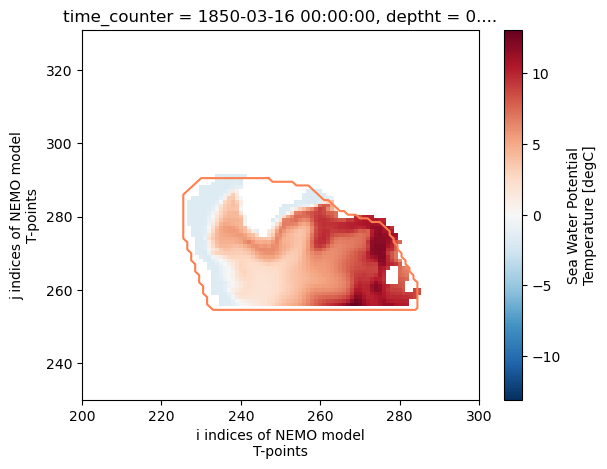

In [8]:
# Plot:
da_mlotst = nemo['gridT']['thetao'].isel(k=0).where(nemo['gridT']['tmaskutil'])
da_mlotst.isel(time_counter=2).where(mask).plot(xlim=[200, 300], ylim=[230, 331])

# plt.plot([234, 285], [256, 256], lw=2, color='pink')
# plt.plot([230, 245], [292, 292], lw=2, color='pink')
# plt.plot([226, 226], [275, 286], lw=2, color='pink')
# plt.plot([285, 285], [256, 262], lw=2, color='pink')
# plt.scatter([257, 267, 277, 281], [289, 282, 278, 270], color='pink')

plt.plot([bdy[1] for bdy in boundary[0]], [bdy[0] for bdy in boundary[0]], color='coral')

In [15]:
i_poly = np.array([bdy[1] for bdy in boundary[0]][-55:-12])
j_poly = np.array([bdy[0] for bdy in boundary[0]][-55:-12])
i_poly = np.concatenate([i_poly, np.array([263, 280, 294, 294, 281])]) + 0.5
j_poly = np.concatenate([j_poly + 0.5, np.array([310, 310, 299, 278, 270])]) + 0.5

mask_GIN = create_polygon_mask(lon_grid=nemo['gridT']['i'].expand_dims(dim={"j": nemo['gridT']['j'].size}, axis=0),
                           lat_grid=nemo['gridT']['j'].expand_dims(dim={"i": nemo['gridT']['i'].size}, axis=1),
                           lon_poly=i_poly,
                           lat_poly=j_poly,
                           dims=('j', 'i')
                           )

mask_GIN_data = mask_GIN.astype('int').values
boundary_GIN = measure.find_contours(image=mask_GIN_data, level=0.5)

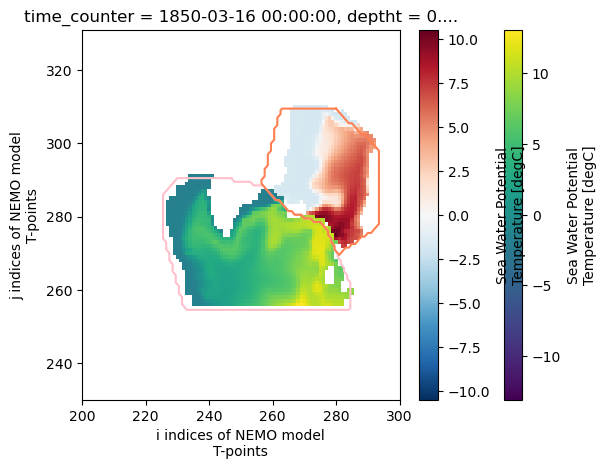

In [16]:
# Plot:
da_mlotst.isel(time_counter=2).where((mask)).plot(xlim=[200, 300], ylim=[230, 331], cmap='viridis') # .where(mask | mask_GIN)
da_mlotst.isel(time_counter=2).where((mask_GIN)).plot(xlim=[200, 300], ylim=[230, 331], cmap='RdBu_r') # .where(mask | mask_GIN)

plt.plot([bdy[1] for bdy in boundary[0]], [bdy[0] for bdy in boundary[0]], color='pink')
plt.plot([bdy[1] for bdy in boundary_GIN[0]], [bdy[0] for bdy in boundary_GIN[0]], color='coral')

i = np.array([bdy[1] for bdy in boundary[0]][-55:-12])
j = np.array([bdy[0] for bdy in boundary[0]][-55:-12])
i = np.concatenate([i, np.array([263, 280, 294, 294, 281])])
j = np.concatenate([j, np.array([310, 310, 299, 278, 270])])
# plt.plot(i, j, color='coral')
# plt.scatter([257, 267, 277, 281, 294, 294, 280, 263, 257], [289, 282, 278, 270, 278, 299, 310, 310, 289], s=15, color='pink')



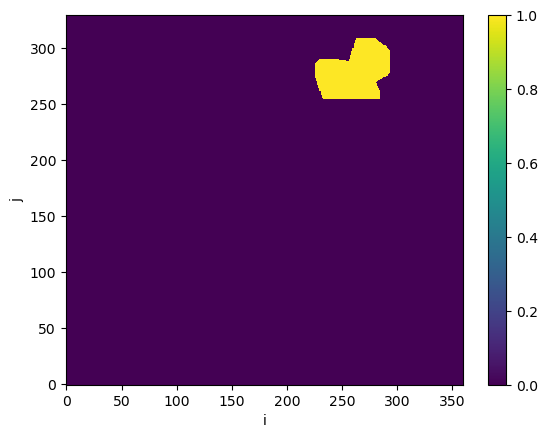

In [17]:
(mask.astype(int) + mask_GIN.astype(int)).plot()

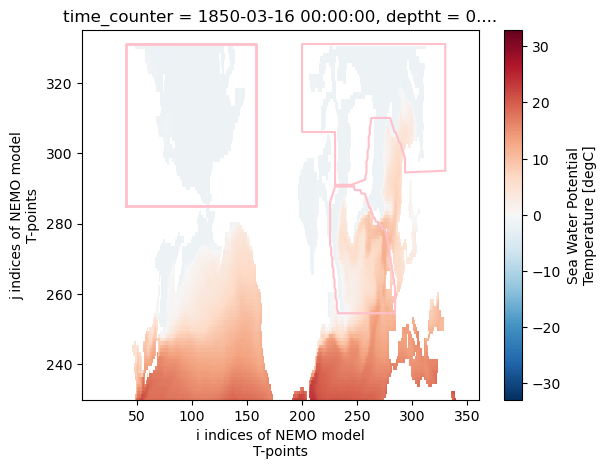

In [29]:
# Plot:
da_mlotst.isel(time_counter=2).plot(ylim=[230, 335])

plt.plot([bdy[1] for bdy in boundary[0]], [bdy[0] for bdy in boundary[0]], color='pink')
# plt.plot([bdy[1] for bdy in boundary_GIN[0]][-30:], [bdy[0] for bdy in boundary_GIN[0]][-30:], color='coral')
# plt.plot([bdy[1] for bdy in boundary_GIN[0]][:41], [bdy[0] for bdy in boundary_GIN[0]][:41], color='coral')
# plt.plot([230, 230, 200, 200, 330, 330], [291, 306, 306, 331, 331, 295], lw=2, color='pink')
plt.plot([40, 158, 158, 40, 40], [285, 285, 331, 331, 285], lw=2, color='pink')

i = np.concatenate([np.array([230, 230, 200, 200, 330, 330]),
                    np.array([bdy[1] for bdy in boundary_GIN[0]][-30:]),
                    np.array([bdy[1] for bdy in boundary_GIN[0]][:41]),
                    np.array([245, 230])])
j = np.concatenate([np.array([291, 306, 306, 331, 331, 295]),
                    np.array([bdy[0] for bdy in boundary_GIN[0]][-30:]),
                    np.array([bdy[0] for bdy in boundary_GIN[0]][:41]),
                    np.array([291, 291])])

plt.plot(i, j, color='pink')


In [34]:
i_poly = np.concatenate([np.array([230, 230, 200, 200, 330, 330]),
                    np.array([bdy[1] for bdy in boundary_GIN[0]][-30:]),
                    np.array([bdy[1] for bdy in boundary_GIN[0]][:41]),
                    np.array([245, 230])]) + 0.5

j_poly = np.concatenate([np.array([291, 306, 306, 330, 330, 295]),
                    np.array([bdy[0] for bdy in boundary_GIN[0]][-30:]) + 0.5,
                    np.array([bdy[0] for bdy in boundary_GIN[0]][:41]) + 0.5,
                    np.array([291, 291])]) + 0.5

mask_AO = create_polygon_mask(lon_grid=nemo['gridT']['i'].expand_dims(dim={"j": nemo['gridT']['j'].size}, axis=0),
                              lat_grid=nemo['gridT']['j'].expand_dims(dim={"i": nemo['gridT']['i'].size}, axis=1),
                              lon_poly=i_poly,
                              lat_poly=j_poly,
                              dims=('j', 'i')
                             )

mask_AO_data = mask_AO.astype('int').values
boundary_AO = measure.find_contours(image=mask_AO_data, level=0.5)

In [35]:
mask_AO_LHS = create_polygon_mask(lon_grid=nemo['gridT']['i'].expand_dims(dim={"j": nemo['gridT']['j'].size}, axis=0),
                                  lat_grid=nemo['gridT']['j'].expand_dims(dim={"i": nemo['gridT']['i'].size}, axis=1),
                                  lon_poly=[40, 158, 158, 40, 40],
                                  lat_poly=[285, 285, 331, 331, 285],
                                  dims=('j', 'i')
                                 )

In [36]:
mask_AO_complete = mask_AO | mask_AO_LHS

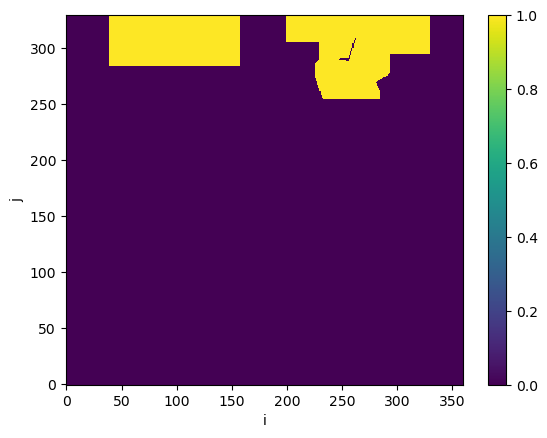

In [37]:
(mask_AO_complete.astype(int) + mask_GIN.astype(int) + mask.astype(int)).plot()

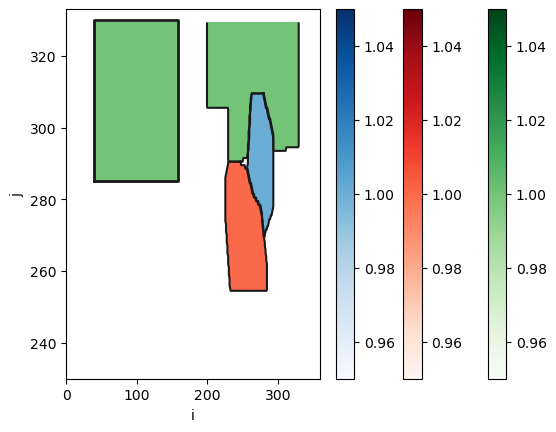

In [14]:
# -- Plotting -- #
mask_AO_complete.where(mask_AO_complete).plot(ylim=[230, 333], cmap='Greens')
mask.where(mask).plot(ylim=[230, 333], cmap='Reds')
mask_GIN.where(mask_GIN).plot(ylim=[230, 333], cmap='Blues')

plt.plot([bdy[1] for bdy in boundary[0]], [bdy[0] for bdy in boundary[0]], color='0.1')
plt.plot([bdy[1] for bdy in boundary_GIN[0]], [bdy[0] for bdy in boundary_GIN[0]], color='0.1')
plt.plot([bdy[1] for bdy in boundary_AO[0]], [bdy[0] for bdy in boundary_AO[0]], color='0.1')
plt.plot([40, 158, 158, 40, 40], [285, 285, 330, 330, 285], lw=2, color='0.1')


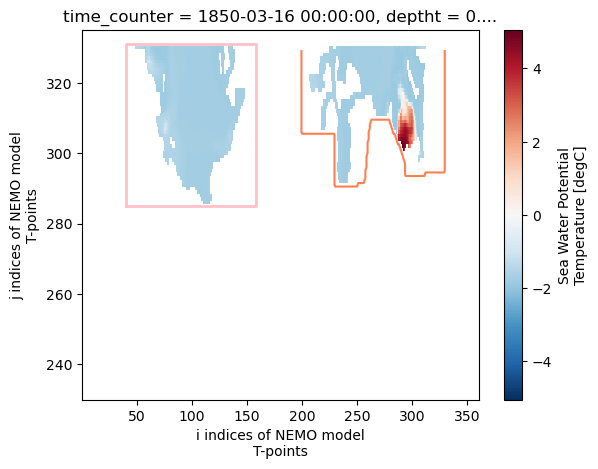

In [15]:
da_mlotst.isel(time_counter=2).where(mask_AO_complete).plot(ylim=[230, 335])

plt.plot([bdy[1] for bdy in boundary_AO[0]], [bdy[0] for bdy in boundary_AO[0]], color='coral')
plt.plot([40, 158, 158, 40, 40], [285, 285, 331, 331, 285], lw=2, color='pink')

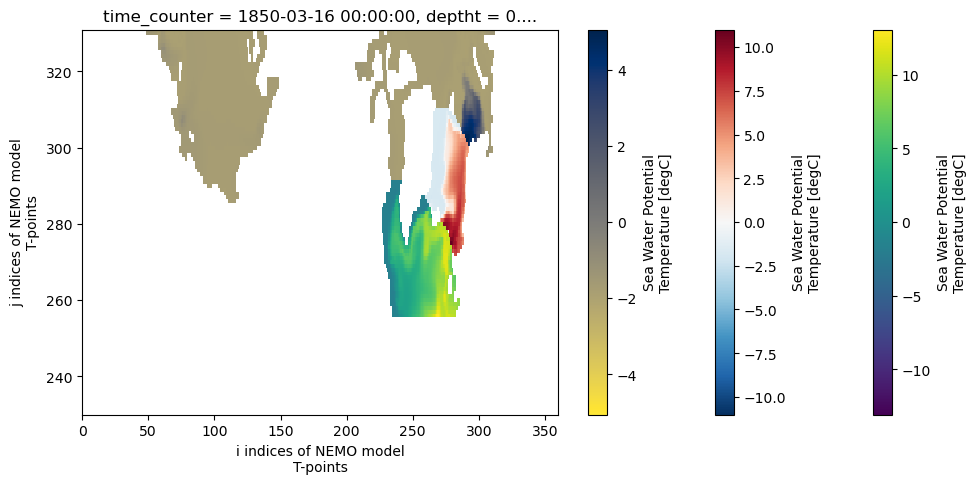

In [16]:
# Plot:
plt.figure(figsize=(12, 5))
da_mlotst.isel(time_counter=2).where(mask).plot(xlim=[0, 360], ylim=[230, 331], cmap='viridis')
da_mlotst.isel(time_counter=2).where(mask_GIN).plot(xlim=[0, 360], ylim=[230, 331], cmap='RdBu_r')
da_mlotst.isel(time_counter=2).where(mask_AO_complete).plot(xlim=[0, 360], ylim=[230, 331], cmap='cividis_r')

# plt.plot([bdy[1] for bdy in boundary[0]], [bdy[0] for bdy in boundary[0]], color='pink')
# plt.plot([bdy[1] for bdy in boundary_GIN[0]], [bdy[0] for bdy in boundary_GIN[0]], color='coral')
# plt.plot([bdy[1] for bdy in boundary_AO[0]], [bdy[0] for bdy in boundary_AO[0]], color='coral')


In [43]:
nemo_bdy = nemo.extract_mask_boundary(mask=mask, uv_vars=['umo', 'vmo']).isel(time_counter=0)

nemo_bdy


<xarray.Dataset> Size: 240kB
Dimensions:       (bdy: 191, k: 75)
Coordinates:
  * bdy           (bdy) int64 2kB 0 1 2 3 4 5 6 ... 184 185 186 187 188 189 190
  * k             (k) int64 600B 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75
    time_counter  object 8B 1850-01-16 00:00:00
    glamb         (bdy) float64 2kB -45.45 -44.59 -43.75 ... -46.77 -45.45
    gphib         (bdy) float64 2kB 69.52 69.33 69.13 69.23 ... 69.27 69.4 69.52
    depthb        (k, bdy) float64 115kB 0.5058 0.5058 ... 5.902e+03 5.902e+03
Data variables:
    i_bdy         (bdy) float64 2kB 248.0 248.5 249.0 ... 246.0 247.0 248.0
    j_bdy         (bdy) float64 2kB 291.5 291.0 290.5 ... 291.5 291.5 291.5
    flux_type     (bdy) <U1 764B 'V' 'U' 'V' 'V' 'V' 'V' ... 'V' 'V' 'V' 'V' 'V'
    flux_dir      (bdy) int64 2kB 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    velocity      (k, bdy) float64 115kB dask.array<chunksize=(75, 191), meta=np.ndarray>

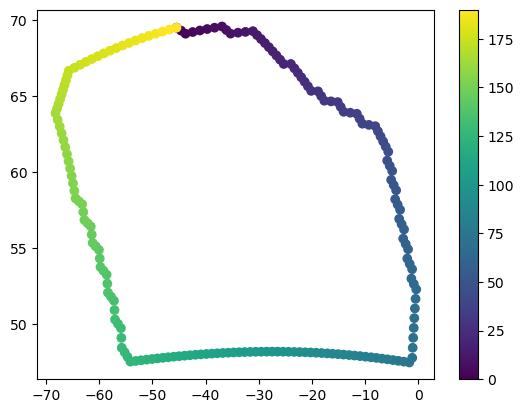

In [44]:
plt.scatter(nemo_bdy.glamb, nemo_bdy.gphib, c=np.arange(nemo_bdy.gphib.size))
plt.colorbar()

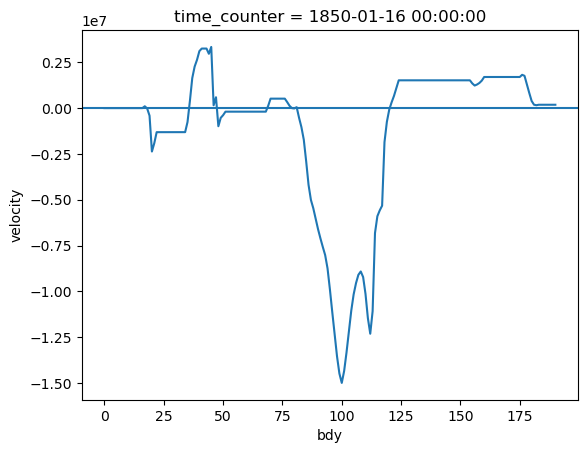

In [49]:
(nemo_bdy['velocity'] / 1025).sum(dim='k').cumsum(dim='bdy').plot()
plt.axhline(y=0)

# (nemo_bdy['velocity'] / 1025).plot(vmin=-0.6E6, vmax=0.6E6, cmap='RdBu_r')
# (nemo_bdy['velocity'] / 1025).sum(dim='k').plot()

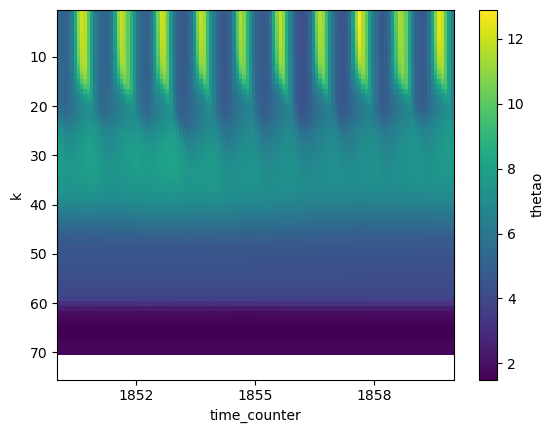

In [20]:
nemo['gridT/thetao'].where(mask).isel(time_counter=slice(0, 120)).weighted((nemo['gridT/e1t'] * nemo['gridT/e2t']).fillna(0)).mean(dim=['i', 'j']).plot(y='k', yincrease=False)


## Test Regional Masks:

In [38]:
ds_mask = xr.open_dataset("/g100/home/userexternal/otooth00/OptimESM/data/CINECA/MOHC/UKESM1_Ofx/regional_masks_Ofx_UKESM1-2.nc")
ds_mask

<xarray.Dataset> Size: 3MB
Dimensions:     (j: 330, i: 360)
Coordinates:
    gphit       (j, i) float64 950kB ...
    glamt       (j, i) float64 950kB ...
Dimensions without coordinates: j, i
Data variables:
    spnamsk     (j, i) bool 119kB ...
    ginmsk      (j, i) bool 119kB ...
    aomsk       (j, i) bool 119kB ...
    spnamsk_oo  (j, i) bool 119kB ...
    ginmsk_oo   (j, i) bool 119kB ...
    aomsk_oo    (j, i) bool 119kB ...
    spnamsk_ss  (j, i) bool 119kB ...
    ginmsk_ss   (j, i) bool 119kB ...
    aomsk_ss    (j, i) bool 119kB ...

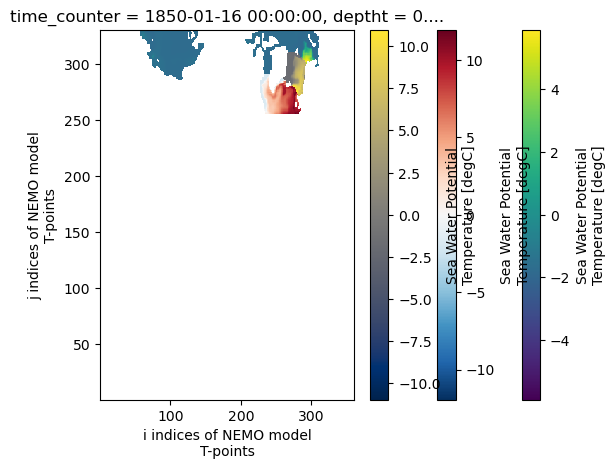

In [39]:
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['aomsk']).plot(cmap='viridis')
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['spnamsk']).plot()
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['ginmsk']).plot(cmap='cividis')

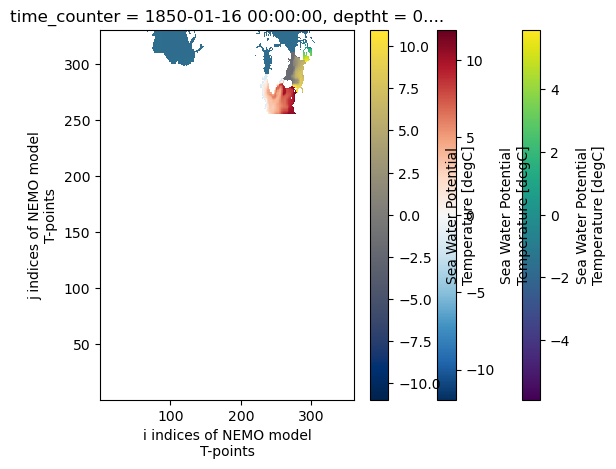

In [40]:
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['aomsk_oo']).plot(cmap='viridis')
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['spnamsk_oo']).plot()
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['ginmsk_oo']).plot(cmap='cividis')

In [ ]:
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['aomsk_ss']).plot(cmap='viridis')
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['spnamsk_ss']).plot()
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['ginmsk_ss']).plot(cmap='cividis')